In [106]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

In [121]:
df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]


forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True) #fill NaN values with -99999

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace = True)

35


In [122]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,0.346805,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,0.495942,0.476195,2774967.0,1026.550000


In [123]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

clf = LinearRegression(n_jobs = -1)  # n_jobs = -1 runs as many jobs as your processor can handle

clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [124]:
accuracy = clf.score(X_test, y_test) #test accuracy
print(accuracy)

0.977322912077664


In [125]:
for X,y in zip(X_test,y_test):
    print(f'Model: {clf.predict([X])[0]}, Actual: {y}')

Model: 583.3424929770367, Actual: 567.73755143277
Model: 246.9430648977888, Actual: 260.22328434974287
Model: 686.3917039117154, Actual: 760.04
Model: 410.63961001041713, Actual: 390.0289821034953
Model: 530.3544317606382, Actual: 552.0140143801826
Model: 391.33557785753794, Actual: 335.0191720898499
Model: 1012.6653789109381, Actual: 1063.29
Model: 279.6789738196622, Actual: 287.38713655925267
Model: 553.8743359912775, Actual: 555.29
Model: 741.2559318563774, Actual: 744.87
Model: 230.95190759148744, Actual: 291.39952240999264
Model: 668.544330026819, Actual: 765.25
Model: 303.05024802582204, Actual: 261.2564737063084
Model: 189.06317051022705, Actual: 151.94403668521045
Model: 92.67864480152383, Actual: 103.29887372730136
Model: 559.1092158269649, Actual: 596.932673979217
Model: 260.3302161321442, Actual: 305.753832791015
Model: 155.03742067913606, Actual: 154.7627377453553
Model: 545.4627686748338, Actual: 563.2436792799413
Model: 257.3001360299306, Actual: 245.96426813267556
Model:

In [112]:
forecast_set = clf.predict(X_lately)   #prediction
print(forecast_set, accuracy, forecast_out)

[1076.70041433 1091.13421923 1105.07389893 1099.92866019 1093.54291576
 1090.85966932 1089.17648131 1086.17174966 1080.12006033 1075.76614685
 1073.33808652 1092.44682439 1110.90106066 1115.71797094 1130.43041613
 1134.5146183  1133.29942068 1130.64780786 1132.4900435  1150.52419434
 1150.32083834 1159.99287797 1156.70604253 1164.30216282 1184.38812173
 1196.97175907 1191.67003289 1203.26660095 1208.81092381 1207.01518424
 1197.75339789 1203.27111638 1201.82229954 1137.72358853 1085.3998957 ] 0.9792890135430822 35


In [126]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

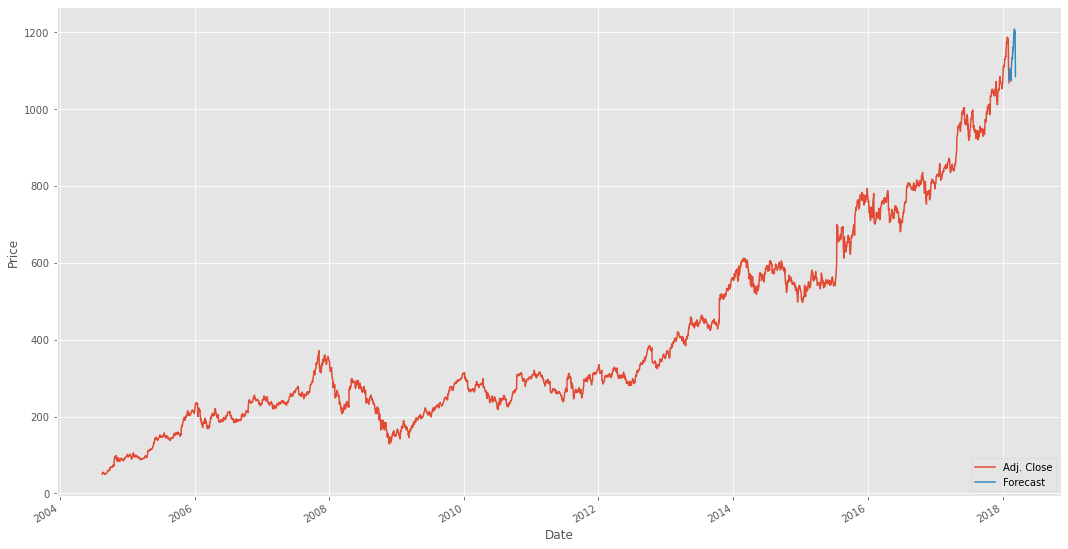

In [131]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')

fig = plt.gcf()
fig.set_size_inches(18, 10)

plt.show()

In [115]:
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) #test accuracy
print(accuracy)
for X,y in zip(X_test,y_test):
    print(f'Model: {clf.predict([X])[0]}, Actual: {y}')

0.8127317954001767
Model: 676.1211008018755, Actual: 1119.2
Model: 735.5223793600511, Actual: 959.9
Model: 291.2923672702375, Actual: 337.8278421853679
Model: 215.0515397824933, Actual: 90.25861971239635
Model: 715.1018749513012, Actual: 805.59
Model: 476.6677463354749, Actual: 532.2
Model: 189.54165544687433, Actual: 154.82793901542982
Model: 273.00245279036994, Actual: 243.5116972814107
Model: 298.5624057153991, Actual: 143.2672522829852
Model: 344.9361031356989, Actual: 371.1406757111368
Model: 372.02009449930193, Actual: 333.96592080403065
Model: 274.2961447149663, Actual: 338.9312482943214
Model: 327.42042460961665, Actual: 281.39865067702317
Model: 602.0162202229743, Actual: 522.97
Model: 295.98249083562365, Actual: 270.1138154718169
Model: 386.11899506761745, Actual: 408.6153564605857
Model: 707.8383597975865, Actual: 759.28
Model: 338.89009343500396, Actual: 302.9351317308702
Model: 238.75586382277294, Actual: 224.3074155033064
Model: 308.10549929941385, Actual: 306.45600031489

Model: 707.9786703016576, Actual: 764.32
Model: 236.0961496489806, Actual: 146.62762543297995
Model: 425.8255397966107, Actual: 401.95078356250656
Model: 361.86198243782553, Actual: 327.15489582239945
Model: 586.0198932957625, Actual: 538.77
Model: 193.93046606082203, Actual: 195.8044295161121
Model: 689.6654100873668, Actual: 948.09
Model: 577.7776301484352, Actual: 545.78
Model: 230.54282502461012, Actual: 275.6007531227039
Model: 737.0590877100506, Actual: 852.57
Model: 235.41798972173882, Actual: 214.07081610160597
Model: 287.2808834726654, Actual: 305.11686653721006
Model: 271.7021764924031, Actual: 223.16388553584548
Model: 378.33155597597295, Actual: 397.672577149155
Model: 207.16196951286256, Actual: 161.1574776949722
Model: 350.44272545465304, Actual: 101.66884197543823
Model: 557.5608100264266, Actual: 552.51
Model: 707.818942366496, Actual: 1070.85
Model: 256.8801297689906, Actual: 246.42870179489873
Model: 249.88442234389714, Actual: 249.545322504461
Model: 302.563804248393